In [1]:
#import necessary library for data preprocessing and visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = r'D:\agriaku\agriaku_20230804_qcm_dataset-master\dataset'

# Create an empty dictionary to store the DataFrames with file names as keys
dfs = {}

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Remove the file extension to use as the DataFrame variable name
        name = os.path.splitext(filename)[0]
        
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame and store it with the file name as the key
        dfs[name] = pd.read_csv(file_path,delimiter=';')

In [3]:
#label the data based on QCM files

##QCM3
df3 = dfs['QCM3'] 
df3['label'] = 'QCM3'
##QCM10
df10 = dfs['QCM10']
df10['label'] = 'QCM10'
##QCM6
df6 = dfs['QCM6'] 
df6['label'] = 'QCM6'
##QCM7
df7 = dfs['QCM7'] 
df7['label'] = 'QCM7'
##QCM12
df12 = dfs['QCM12'] 
df12['label'] = 'QCM12'

In [20]:
##Combine the data
dfg = pd.concat([df3,df6,df7,df10,df12],ignore_index=True)

In [21]:
##Check the data
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0.799_0.201_MIP  125 non-null    float64
 1   0.799_0.201_NP   125 non-null    float64
 2   0.700_0.300_MIP  125 non-null    float64
 3   0.700_0.300_NP   125 non-null    float64
 4   0.600_0.400_MIP  125 non-null    float64
 5   0.600_0.400_NP   125 non-null    float64
 6   0.501_0.499_MIP  125 non-null    float64
 7   0.501_0.499_NP   125 non-null    float64
 8   0.400_0.600_MIP  125 non-null    float64
 9   0.400_0.600_NP   125 non-null    float64
 10  1-Octanol        125 non-null    int64  
 11  1-Propanol       125 non-null    int64  
 12  2-Butanol        125 non-null    int64  
 13  2-propanol       125 non-null    int64  
 14  1-isobutanol     125 non-null    int64  
 15  label            125 non-null    object 
dtypes: float64(10), int64(5), object(1)
memory usage: 15.8+ KB


As we can see above, the data have no null values. Because each of them has 125 rows per column. 

In [25]:
###Check if there any duplicate data :
duplicate_rows = dfg[dfg.duplicated()]
print("duplicate rows: ")
print(duplicate_rows)

duplicate rows: 
Empty DataFrame
Columns: [0.799_0.201_MIP, 0.799_0.201_NP, 0.700_0.300_MIP, 0.700_0.300_NP, 0.600_0.400_MIP, 0.600_0.400_NP, 0.501_0.499_MIP, 0.501_0.499_NP, 0.400_0.600_MIP, 0.400_0.600_NP, 1-Octanol, 1-Propanol, 2-Butanol, 2-propanol, 1-isobutanol, label]
Index: []


There is no duplicated data, so we don't have to remove or manipulated the data

### Univariate analysis

Univariate analysis is defined as analysis carried out on only one (“uni”) variable (“variate”) to summarize or describe the variable. So will will be focusing on single column per visualization.

In [27]:
#copy data from main data, so that we will not have messy result
dfv = dfg.copy()

In [28]:
dfg.describe()

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.00000,125.00000,125.00000,125.00000
mean,-52.384480,-51.529200,-82.660160,-78.155200,-117.079120,-107.839040,-151.437360,-138.120160,-190.693680,-173.198880,0.20000,0.20000,0.20000,0.20000,0.20000
std,26.613388,24.374974,42.272666,36.560875,62.101935,52.594443,82.641805,70.392947,108.159961,92.772823,0.40161,0.40161,0.40161,0.40161,0.40161
min,-98.990000,-102.020000,-174.990000,-158.710000,-261.380000,-224.800000,-341.090000,-289.880000,-447.740000,-381.940000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-69.990000,-66.490000,-110.460000,-105.210000,-157.610000,-144.980000,-210.780000,-189.320000,-263.800000,-250.300000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,-58.410000,-55.730000,-91.650000,-82.390000,-118.700000,-105.510000,-156.310000,-126.300000,-192.030000,-157.010000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,-28.790000,-35.170000,-43.820000,-50.840000,-58.240000,-68.000000,-75.410000,-77.510000,-93.950000,-91.330000,0.00000,0.00000,0.00000,0.00000,0.00000
max,-9.400000,-7.950000,-14.430000,-17.280000,-24.640000,-27.350000,-35.280000,-39.910000,-40.630000,-49.870000,1.00000,1.00000,1.00000,1.00000,1.00000


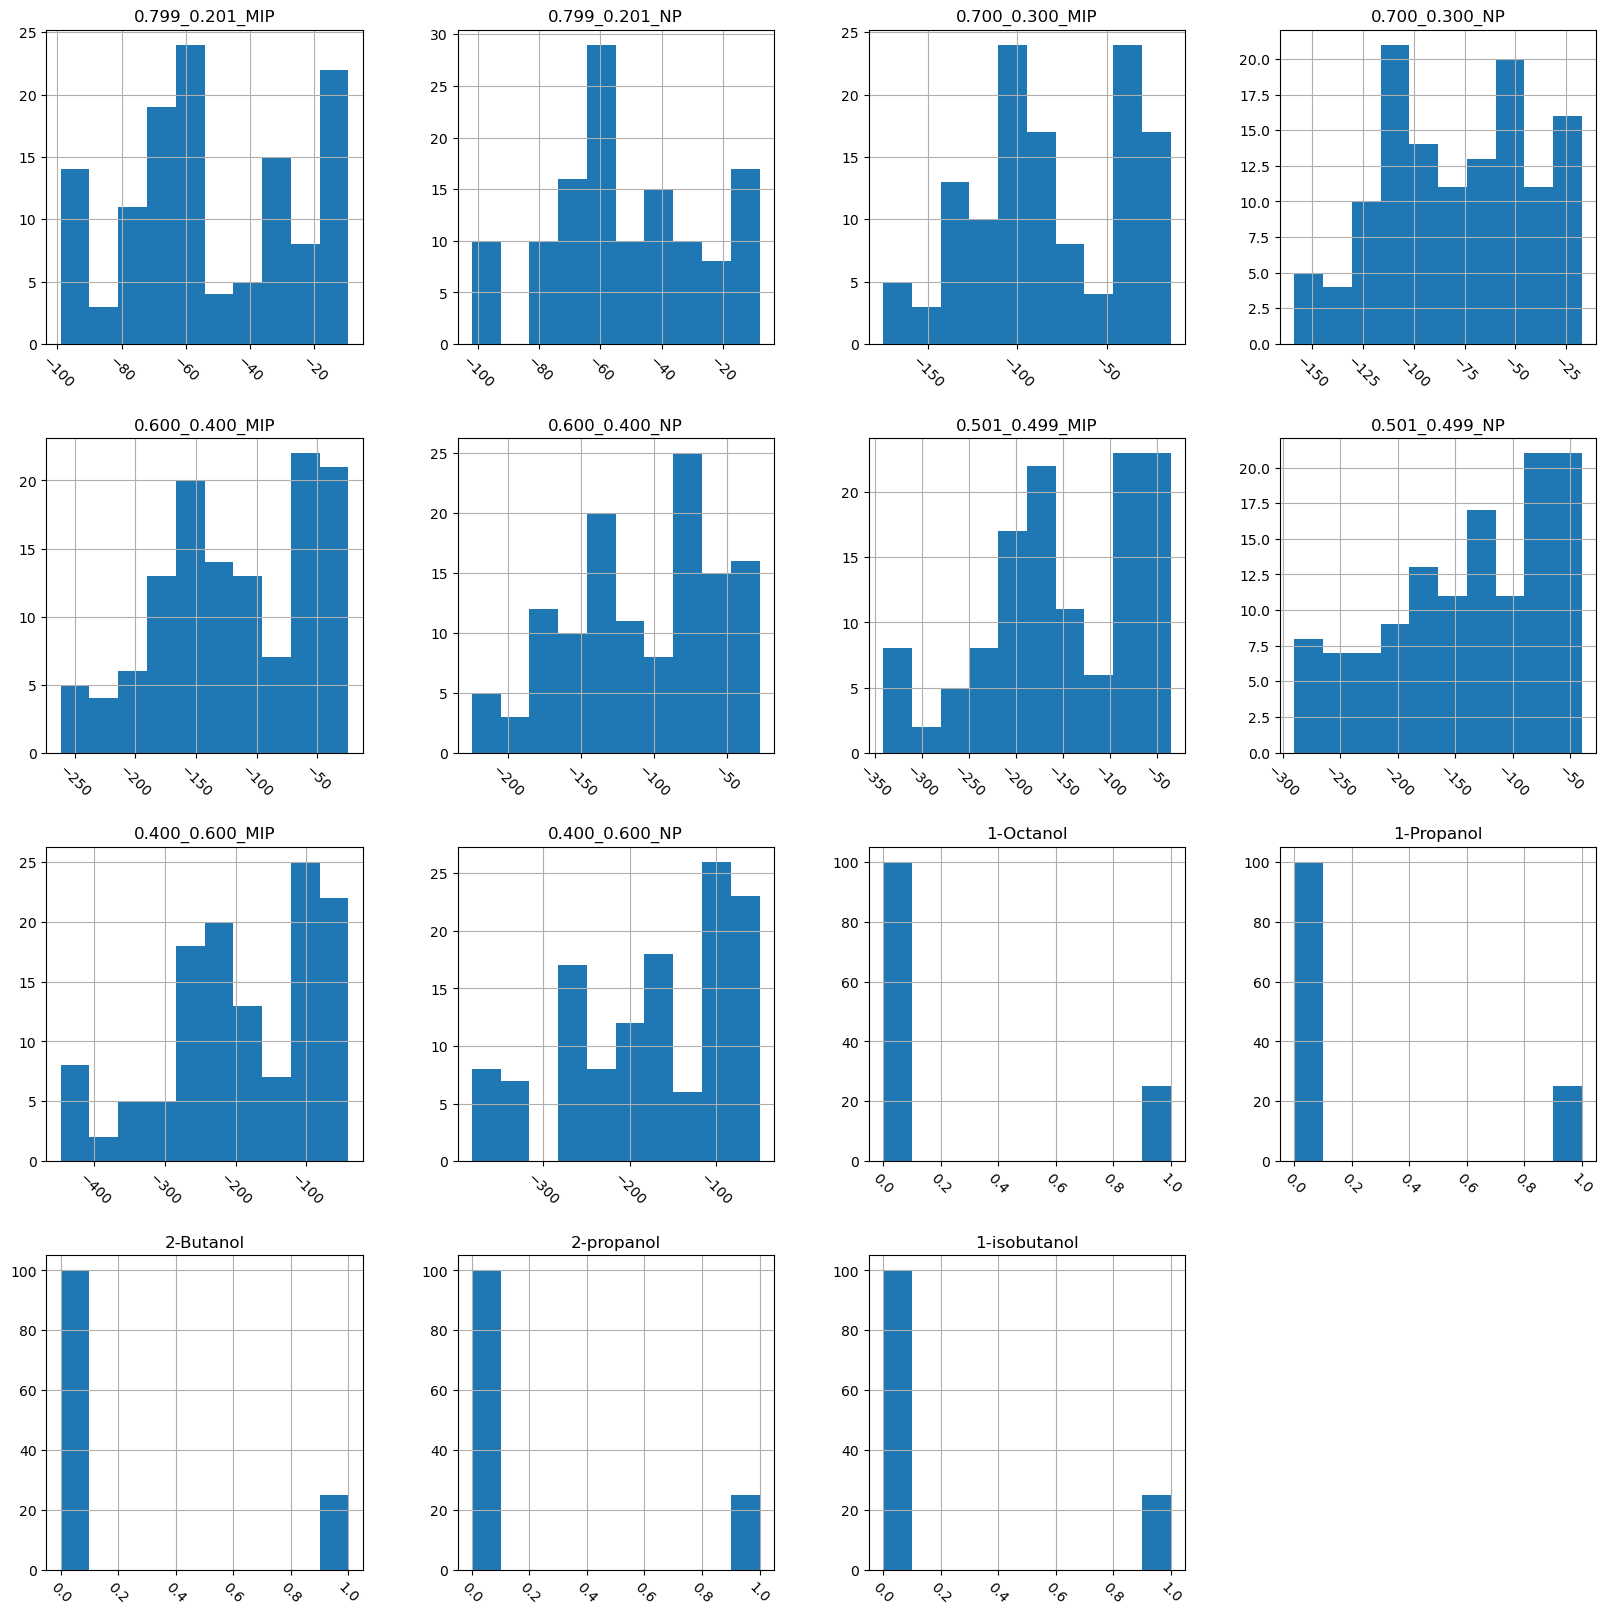

In [29]:
dfv.hist(figsize=(20,20), xrot=-45)
plt.show()

By creating histogram, we will be able to see the data distribution and patterns. 0.799_0.201_MIP, 0.799_0.201_NP and 0.600_0.400_MIP, 0.600_0.400_NP have similarity data distribution and patterns. We can ignore the 1-Octanol, 1-Propanol, 2-Butanol, 2-propanol and 1-isobutanol since they are classification [1 or 0].

In [31]:
dfv.columns

Index(['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol', 'label'],
      dtype='object')

In [32]:
dfb = dfv[['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP']]

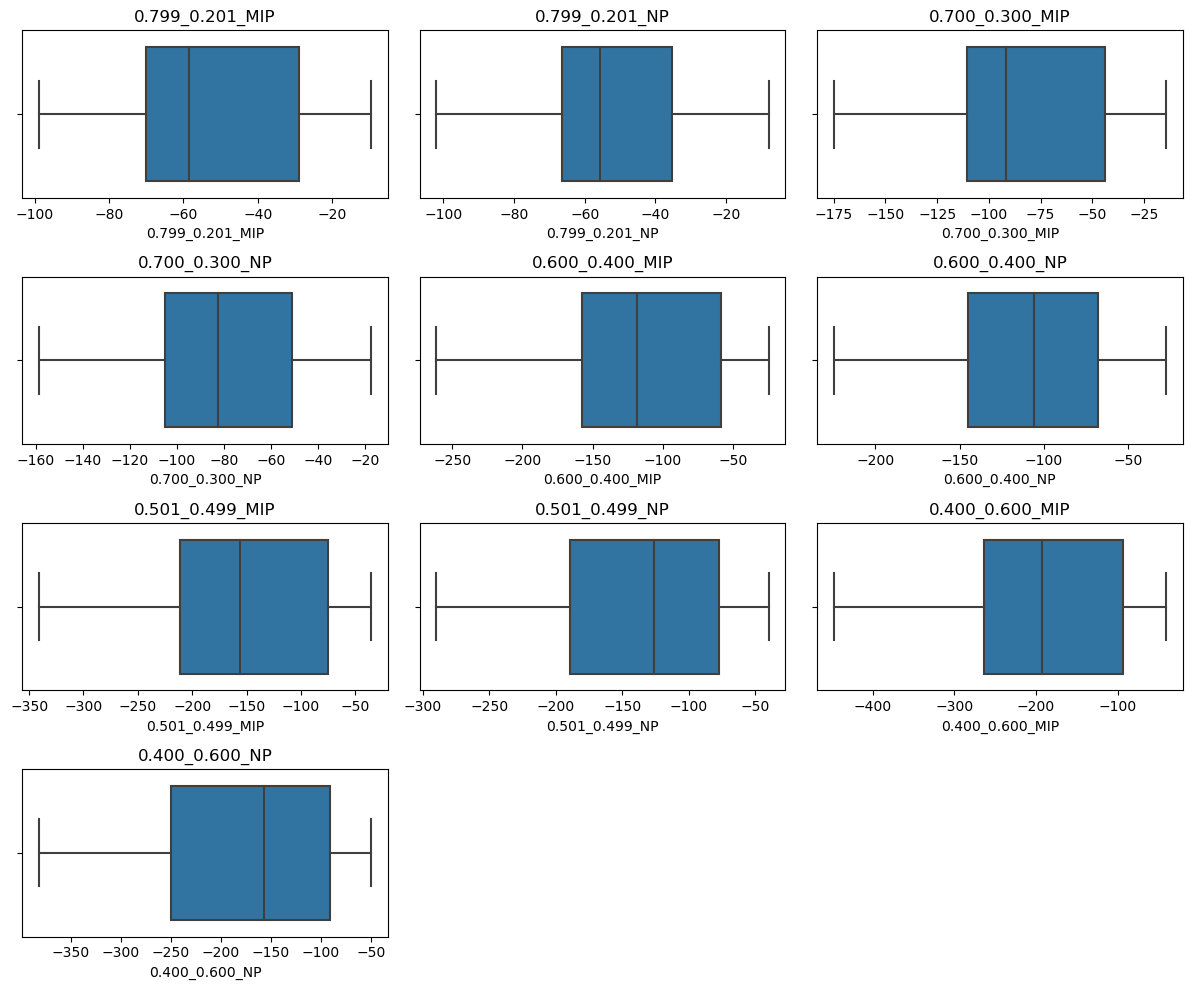

In [46]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, column in enumerate(dfb.columns):
    sns.boxplot(x=dfb[column], ax=axes[i])
    axes[i].set_title(column)

# Calculate the number of empty subplots
num_empty_subplots = num_rows * num_cols - len(dfb.columns)

# Hide empty subplots
for j in range(len(dfb.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.tight_layout()
# Display the plot
plt.show()

Identifying the outliers in dataset by visualizing it into box plot,
Based on the visualization, the data have no outliers, since there are no tiny dots located outside of the minimum or maximum whisker.

In [35]:
dfa = dfv[[ '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol']]

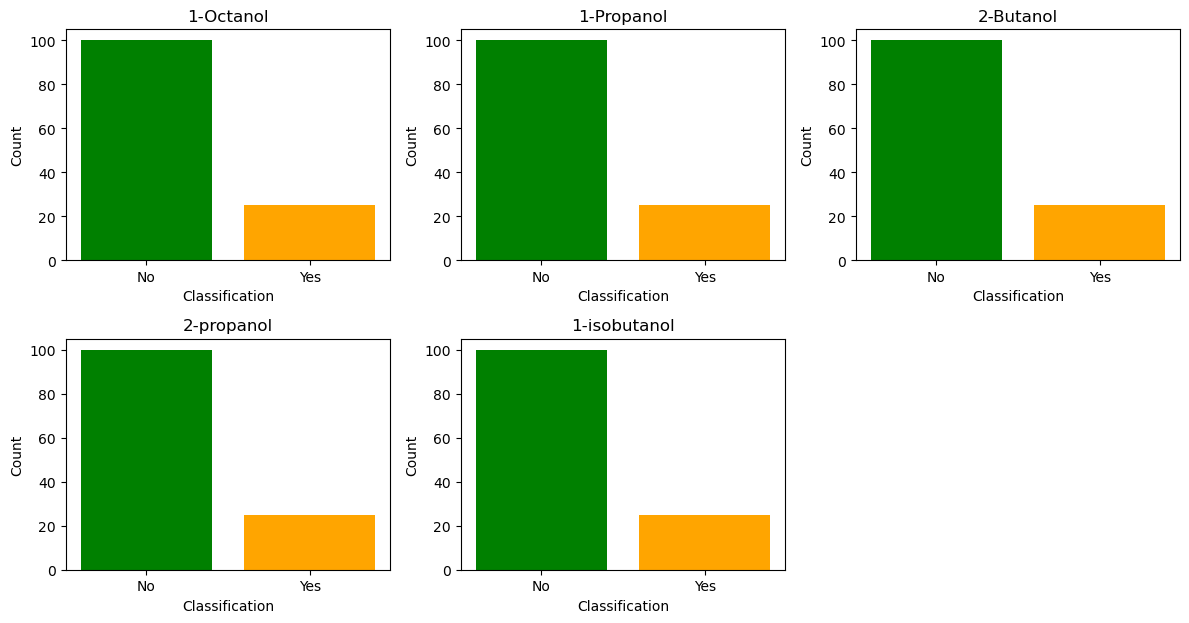

In [42]:
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define colors for "yes" [1] and "no" [0]
colors = ['green', 'orange']

# Create bar charts by iterating through columns
for i, column in enumerate(dfa.columns):
    ax = axes[i]
    counts = dfa[column].value_counts()
    ax.bar(counts.index, counts.values, color=colors)
    ax.set_title(column)
    ax.set_xticks([1, 0])
    ax.set_xticklabels(['Yes', 'No'])
    ax.set_xlabel('Classification')
    ax.set_ylabel('Count')

# Hide empty subplots
for i in range(len(dfa.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing
plt.tight_layout()
# Display the plot
plt.show()

Based on the classification each alcohol type, No has higher values than Yes. So we already know that we will be dealing with imbalanced Yes and No Data. 

### Bivariate Analysis and Multivariate Analysis

The bivariate analysis aims to determine if there is a statistical link between the two or more variables. We will identify relation between two or more variables of columns 

In [48]:
dfv.columns

Index(['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol', 'label'],
      dtype='object')

<Figure size 896x672 with 0 Axes>

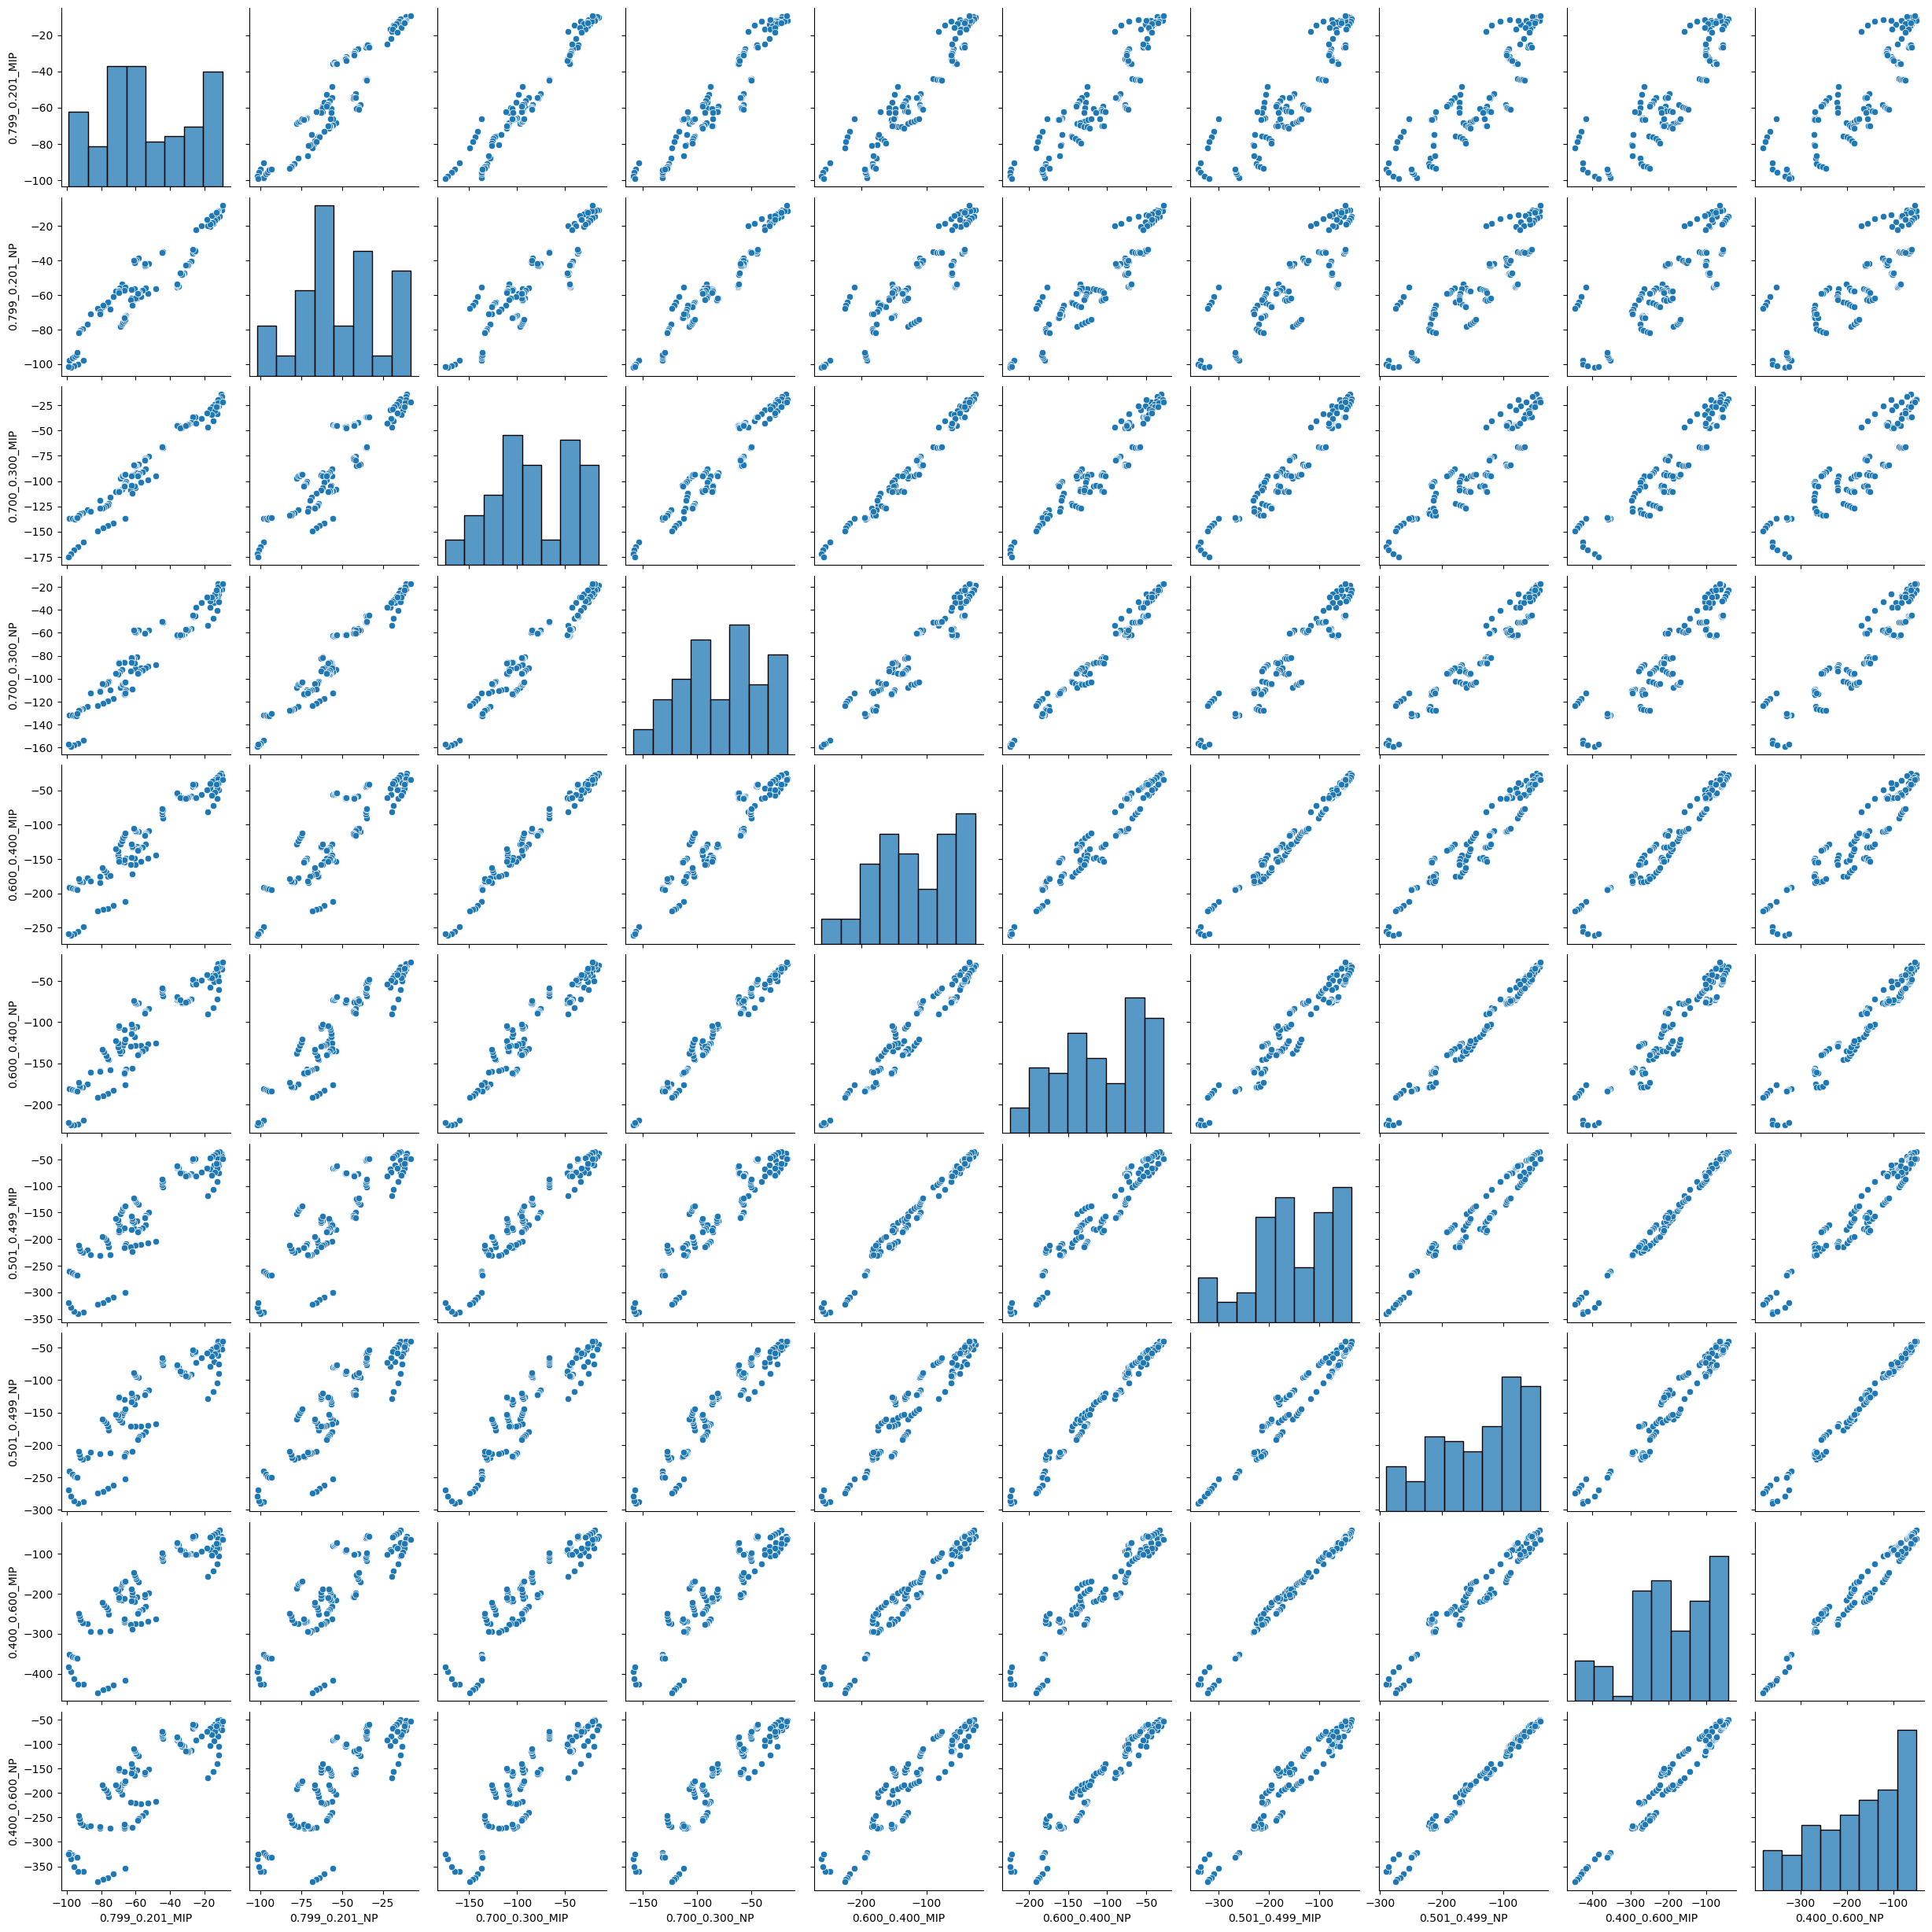

In [50]:
plt.figure(dpi=140)
sns.pairplot(dfv[['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP']])
plt.show()

Based on the paiplot, the data distribution, relationship are vary (positive linear, Heteroscedasticity, Clusters/groups). So far the data looks normal and there is no need to do further manipulation.

In [51]:
dfv.columns

Index(['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol', 'label'],
      dtype='object')

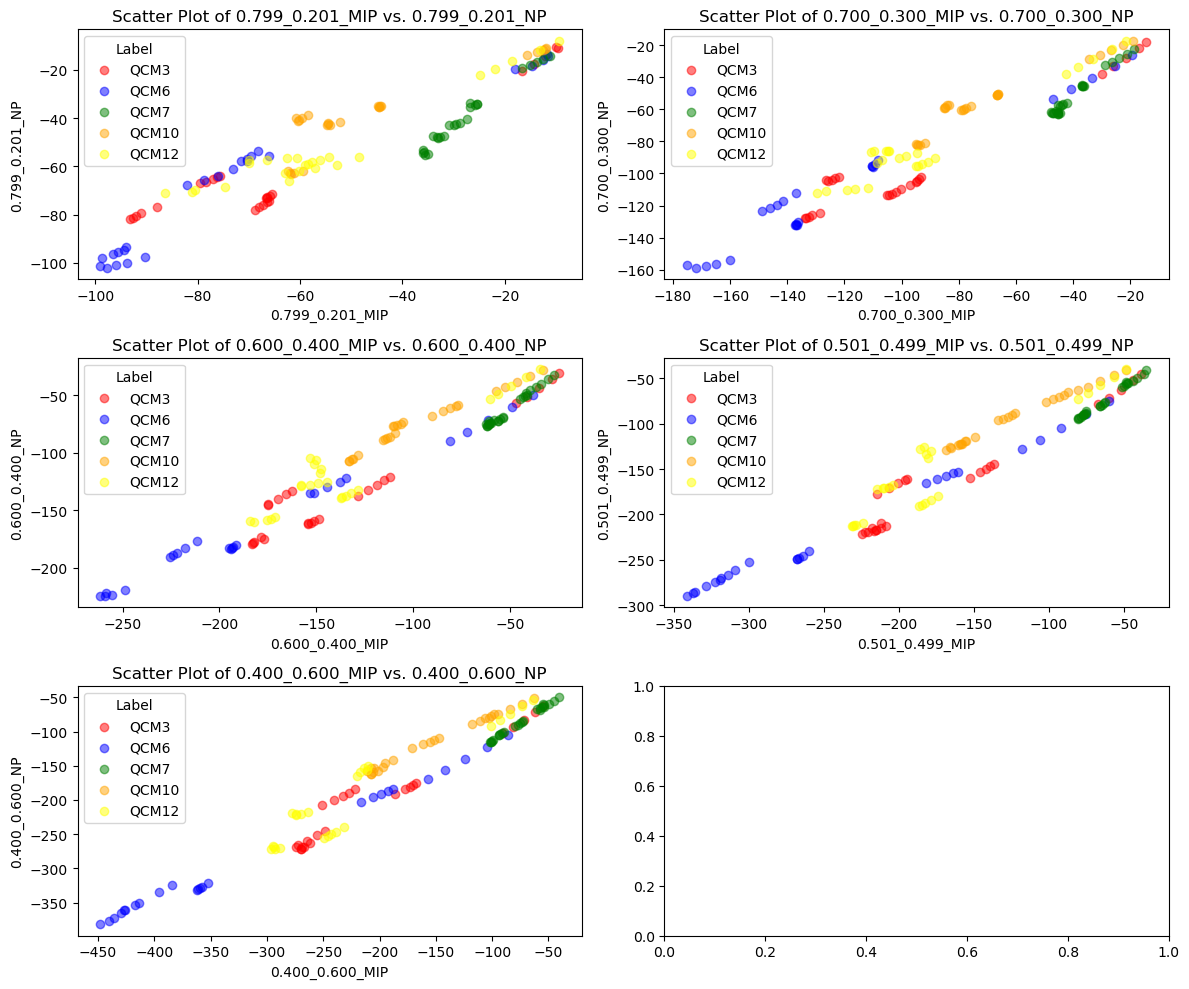

In [56]:
# Define the color mapping
label_color_mapping = {
    'QCM3': 'red',
    'QCM6': 'blue',
    'QCM7': 'green',
    'QCM10': 'orange',
    'QCM12': 'yellow',
}

# Create subplots for all MIP vs. NP pairs
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axs = axs.flatten()

# Iterate through the MIP and NP column pairs
for i, (mip_column, np_column) in enumerate([('0.799_0.201_MIP', '0.799_0.201_NP'),
                                              ('0.700_0.300_MIP','0.700_0.300_NP'),
                                              ('0.600_0.400_MIP', '0.600_0.400_NP'),
                                              ('0.501_0.499_MIP', '0.501_0.499_NP'),
                                            ('0.400_0.600_MIP','0.400_0.600_NP')]):
    # Create a scatter plot for the current pair
    for label, color in label_color_mapping.items():
        mask = dfv['label'] == label
        axs[i].scatter(dfv[mip_column][mask], dfv[np_column][mask], c=color, label=label, alpha=0.5)

    # Add labels and a legend for the current subplot
    axs[i].set_xlabel(mip_column)
    axs[i].set_ylabel(np_column)
    axs[i].set_title(f'Scatter Plot of {mip_column} vs. {np_column}')
    axs[i].legend(title='Label')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


The data was measured using 5 different QCMs, we created a scatter plot for each QCM to see the relationship between each feature NP and MIP. The data tend to create clusters/groups for each QCM measurement. Some of them form linear relationship like 0.501_0.499_MIP and 0.501_0.499_NP.

In [14]:
dfo = dfv[['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Octanol', 'label']]

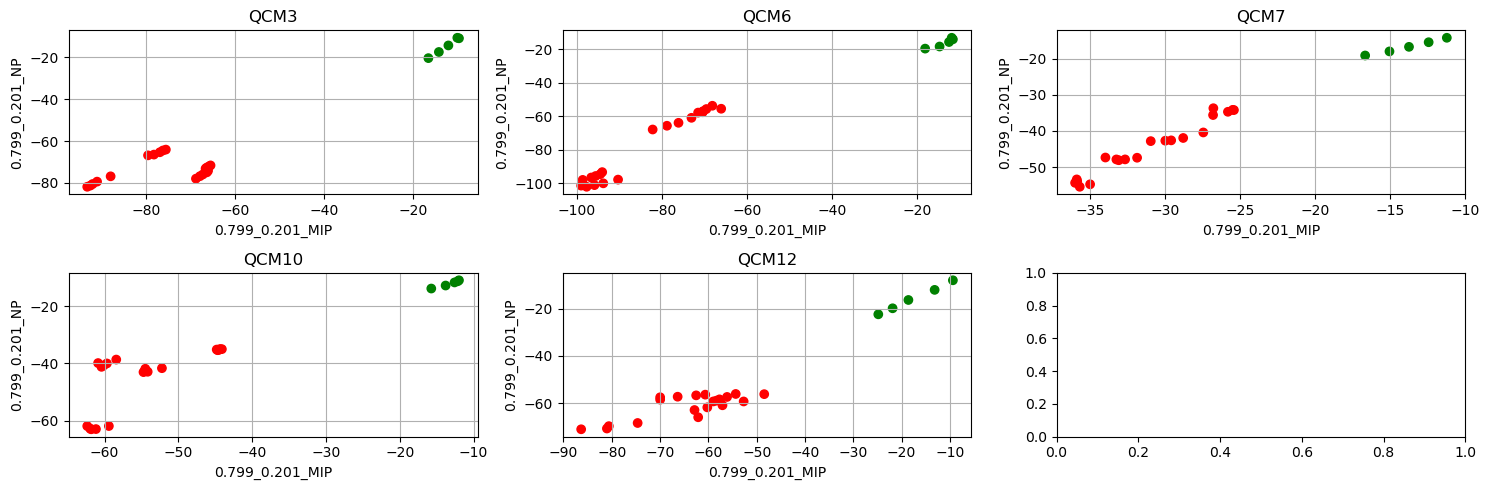

In [19]:
# Get unique labels and their count
unique_labels = dfo['label'].unique()
num_labels = len(unique_labels)

# Determine the number of rows and columns for subplots
num_rows = num_labels // 3 + (num_labels % 3 > 0)  # Adjust for incomplete row
num_cols = min(num_labels, 3)

# Create subplots based on the number of labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
labels = dfv['label'].unique()

for i, label in enumerate(unique_labels):
    if num_rows == 1 and num_cols == 1:
        ax = axes  # If there is only one subplot
    elif num_rows == 1:
        ax = axes[i % num_cols]  # If there is one row of subplots
    else:
        ax = axes[i // num_cols, i % num_cols]  # If there are multiple rows of subplots
    
    subset = dfo[dfo['label'] == label]
    colors = ['green' if val == 1 else 'red' for val in subset['1-Octanol']]  # Red for 0, Green for 1
    ax.scatter(subset['0.799_0.201_MIP'], subset['0.799_0.201_NP'], c=colors)
    ax.set_xlabel('0.799_0.201_MIP')
    ax.set_ylabel('0.799_0.201_NP')
    ax.set_title(f'{label}')
#    ax.set_xlim(0, 1.5)
#    ax.set_ylim(0, 2)
    ax.grid()

plt.tight_layout()
plt.show()


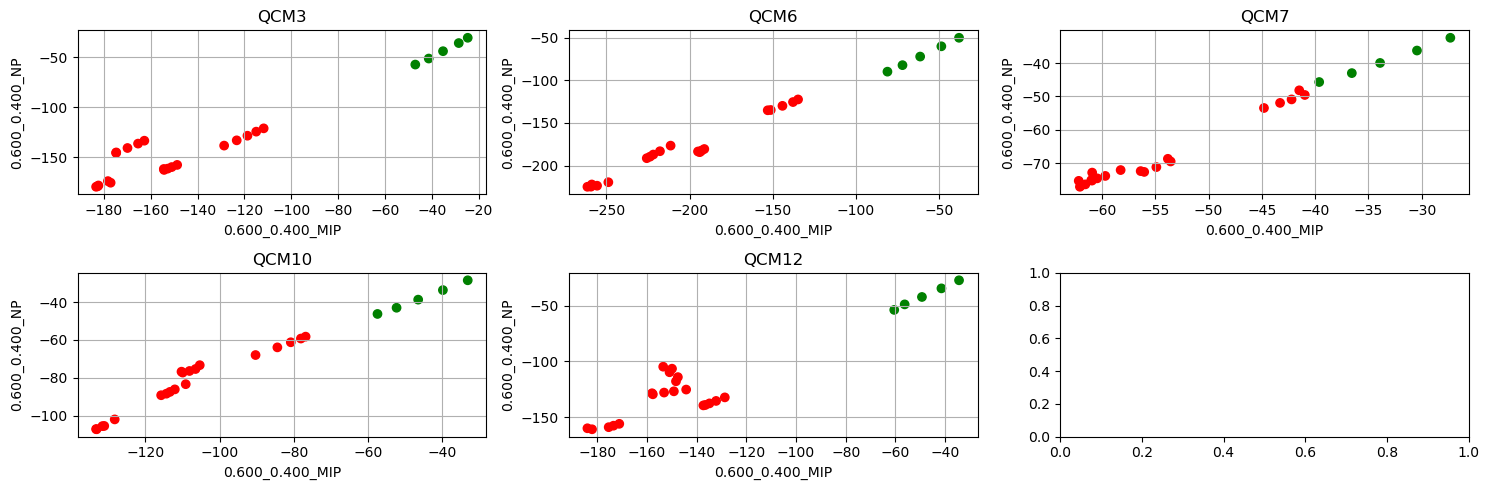

In [58]:
# Get unique labels and their count
unique_labels = dfo['label'].unique()
num_labels = len(unique_labels)

# Determine the number of rows and columns for subplots
num_rows = num_labels // 3 + (num_labels % 3 > 0)  # Adjust for incomplete row
num_cols = min(num_labels, 3)

# Create subplots based on the number of labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
labels = dfv['label'].unique()

for i, label in enumerate(unique_labels):
    if num_rows == 1 and num_cols == 1:
        ax = axes  # If there is only one subplot
    elif num_rows == 1:
        ax = axes[i % num_cols]  # If there is one row of subplots
    else:
        ax = axes[i // num_cols, i % num_cols]  # If there are multiple rows of subplots
    
    subset = dfo[dfo['label'] == label]
    colors = ['green' if val == 1 else 'red' for val in subset['1-Octanol']]  # Red for 0, Green for 1
    ax.scatter(subset['0.600_0.400_MIP'], subset['0.600_0.400_NP'], c=colors)
    ax.set_xlabel('0.600_0.400_MIP')
    ax.set_ylabel('0.600_0.400_NP')
    ax.set_title(f'{label}')
#    ax.set_xlim(0, 1.5)
#    ax.set_ylim(0, 2)
    ax.grid()

plt.tight_layout()
plt.show()


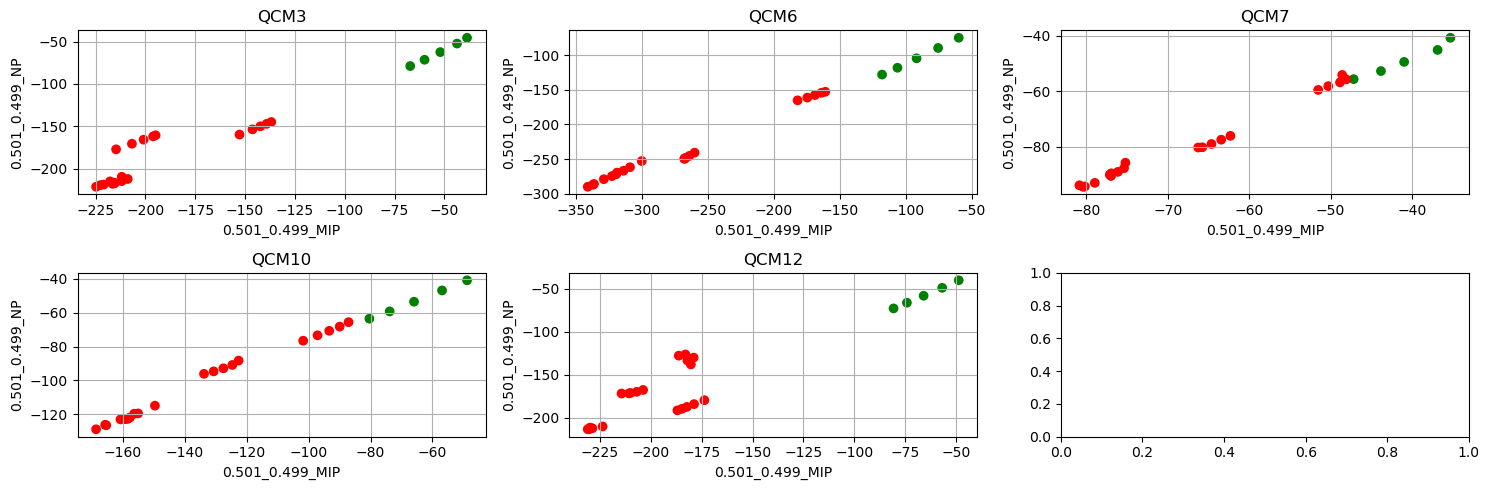

In [57]:
# Get unique labels and their count
unique_labels = dfo['label'].unique()
num_labels = len(unique_labels)

# Determine the number of rows and columns for subplots
num_rows = num_labels // 3 + (num_labels % 3 > 0)  # Adjust for incomplete row
num_cols = min(num_labels, 3)

# Create subplots based on the number of labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
labels = dfv['label'].unique()

for i, label in enumerate(unique_labels):
    if num_rows == 1 and num_cols == 1:
        ax = axes  # If there is only one subplot
    elif num_rows == 1:
        ax = axes[i % num_cols]  # If there is one row of subplots
    else:
        ax = axes[i // num_cols, i % num_cols]  # If there are multiple rows of subplots
    
    subset = dfo[dfo['label'] == label]
    colors = ['green' if val == 1 else 'red' for val in subset['1-Octanol']]  # Red for 0, Green for 1
    ax.scatter(subset['0.501_0.499_MIP'], subset['0.501_0.499_NP'], c=colors)
    ax.set_xlabel('0.501_0.499_MIP')
    ax.set_ylabel('0.501_0.499_NP')
    ax.set_title(f'{label}')
#    ax.set_xlim(0, 1.5)
#    ax.set_ylim(0, 2)
    ax.grid()

plt.tight_layout()
plt.show()


In [61]:
dfv.columns

Index(['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol', 'label', 'color'],
      dtype='object')

We can see from the visualization above that Yes and No data for 1-Octanol has its patterns. The data that are classify as Yes tends to have higher value of NP and MIP. Meanwhile the data that are classify as No has tendency of having lower value of MIP and NP. We will check on others alcohol ('1-Propanol', '2-Butanol', '2-propanol', '1-isobutanol').

In [64]:
dfp = dfv[['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Propanol','label']]

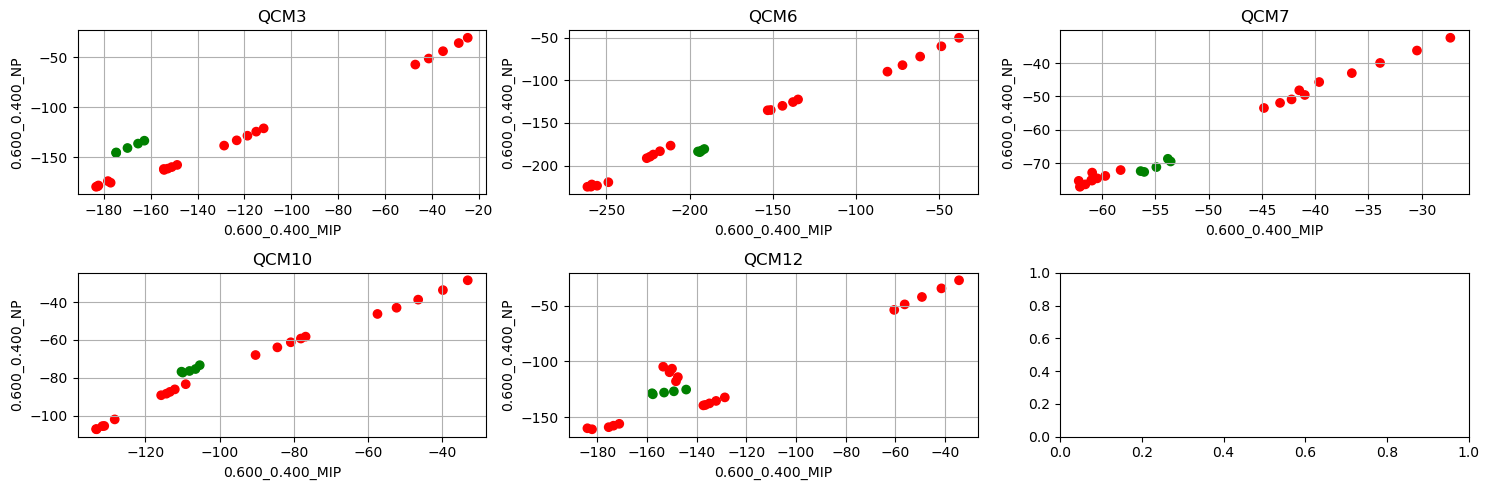

In [66]:
# Get unique labels and their count
unique_labels = dfp['label'].unique()
num_labels = len(unique_labels)

# Determine the number of rows and columns for subplots
num_rows = num_labels // 3 + (num_labels % 3 > 0)  # Adjust for incomplete row
num_cols = min(num_labels, 3)

# Create subplots based on the number of labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
labels = dfv['label'].unique()

for i, label in enumerate(unique_labels):
    if num_rows == 1 and num_cols == 1:
        ax = axes  # If there is only one subplot
    elif num_rows == 1:
        ax = axes[i % num_cols]  # If there is one row of subplots
    else:
        ax = axes[i // num_cols, i % num_cols]  # If there are multiple rows of subplots
    
    subset = dfp[dfp['label'] == label]
    colors = ['green' if val == 1 else 'red' for val in subset['1-Propanol']]  # Red for 0, Green for 1
    ax.scatter(subset['0.600_0.400_MIP'], subset['0.600_0.400_NP'], c=colors)
    ax.set_xlabel('0.600_0.400_MIP')
    ax.set_ylabel('0.600_0.400_NP')
    ax.set_title(f'{label}')
#    ax.set_xlim(0, 1.5)
#    ax.set_ylim(0, 2)
    ax.grid()

plt.tight_layout()
plt.show()


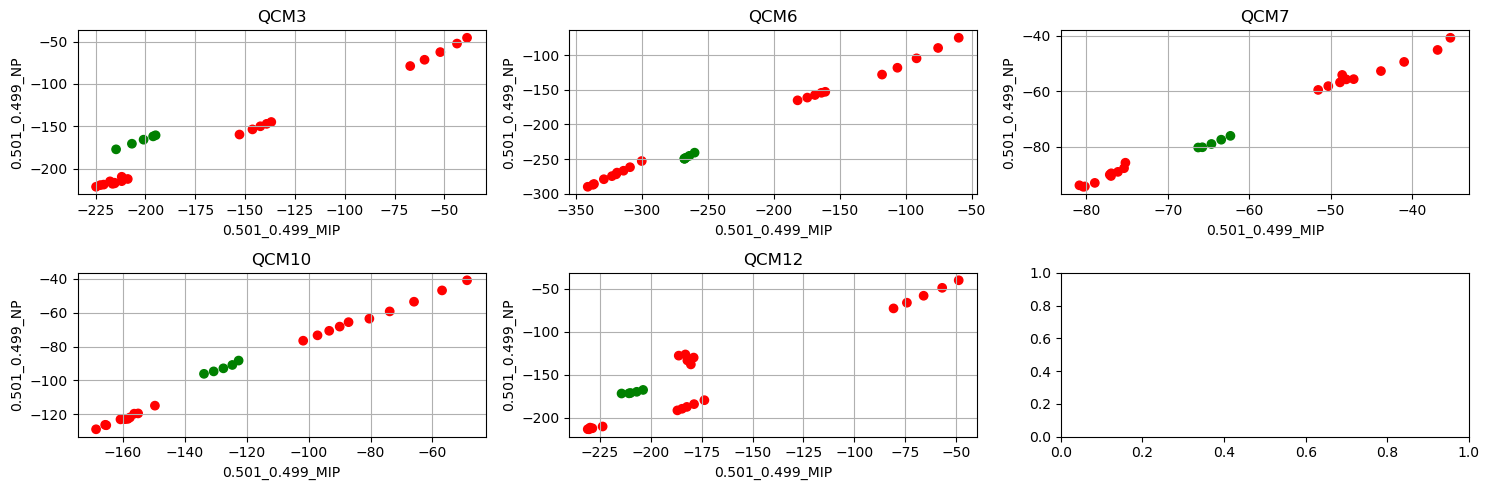

In [67]:
# Get unique labels and their count
unique_labels = dfp['label'].unique()
num_labels = len(unique_labels)

# Determine the number of rows and columns for subplots
num_rows = num_labels // 3 + (num_labels % 3 > 0)  # Adjust for incomplete row
num_cols = min(num_labels, 3)

# Create subplots based on the number of labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
labels = dfv['label'].unique()

for i, label in enumerate(unique_labels):
    if num_rows == 1 and num_cols == 1:
        ax = axes  # If there is only one subplot
    elif num_rows == 1:
        ax = axes[i % num_cols]  # If there is one row of subplots
    else:
        ax = axes[i // num_cols, i % num_cols]  # If there are multiple rows of subplots
    
    subset = dfp[dfp['label'] == label]
    colors = ['green' if val == 1 else 'red' for val in subset['1-Propanol']]  # Red for 0, Green for 1
    ax.scatter(subset['0.501_0.499_MIP'], subset['0.501_0.499_NP'], c=colors)
    ax.set_xlabel('0.501_0.499_MIP')
    ax.set_ylabel('0.501_0.499_NP')
    ax.set_title(f'{label}')
#    ax.set_xlim(0, 1.5)
#    ax.set_ylim(0, 2)
    ax.grid()

plt.tight_layout()
plt.show()


1-Propanol :
<br> 
Instead of having linear relationship, the data tends to have its cluster/groups relationship. Therefor the higher/lower values does not indicates its classification. They create the range of which value of MIP/NP classify as 1-Propanol

In [69]:
dfb = dfv[['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '2-Butanol','label']]

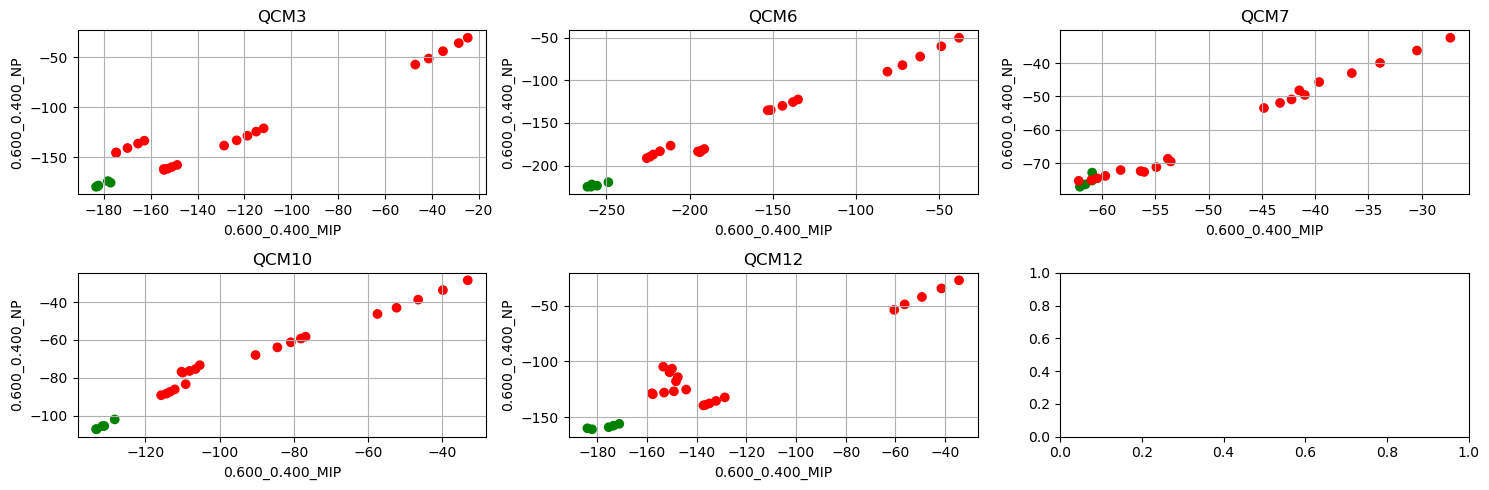

In [70]:
# Get unique labels and their count
unique_labels = dfb['label'].unique()
num_labels = len(unique_labels)

# Determine the number of rows and columns for subplots
num_rows = num_labels // 3 + (num_labels % 3 > 0)  # Adjust for incomplete row
num_cols = min(num_labels, 3)

# Create subplots based on the number of labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
labels = dfb['label'].unique()

for i, label in enumerate(unique_labels):
    if num_rows == 1 and num_cols == 1:
        ax = axes  # If there is only one subplot
    elif num_rows == 1:
        ax = axes[i % num_cols]  # If there is one row of subplots
    else:
        ax = axes[i // num_cols, i % num_cols]  # If there are multiple rows of subplots
    
    subset = dfb[dfb['label'] == label]
    colors = ['green' if val == 1 else 'red' for val in subset['2-Butanol']]  # Red for 0, Green for 1
    ax.scatter(subset['0.600_0.400_MIP'], subset['0.600_0.400_NP'], c=colors)
    ax.set_xlabel('0.600_0.400_MIP')
    ax.set_ylabel('0.600_0.400_NP')
    ax.set_title(f'{label}')
#    ax.set_xlim(0, 1.5)
#    ax.set_ylim(0, 2)
    ax.grid()

plt.tight_layout()
plt.show()


It seems that QCM7 'No' values are inconsistent, its tend to has lower values of NP and MIP but also has high values.

We've seen enough data visualization ana analysis. Therefor we will continue with correlation amongs each variables to perform model building.

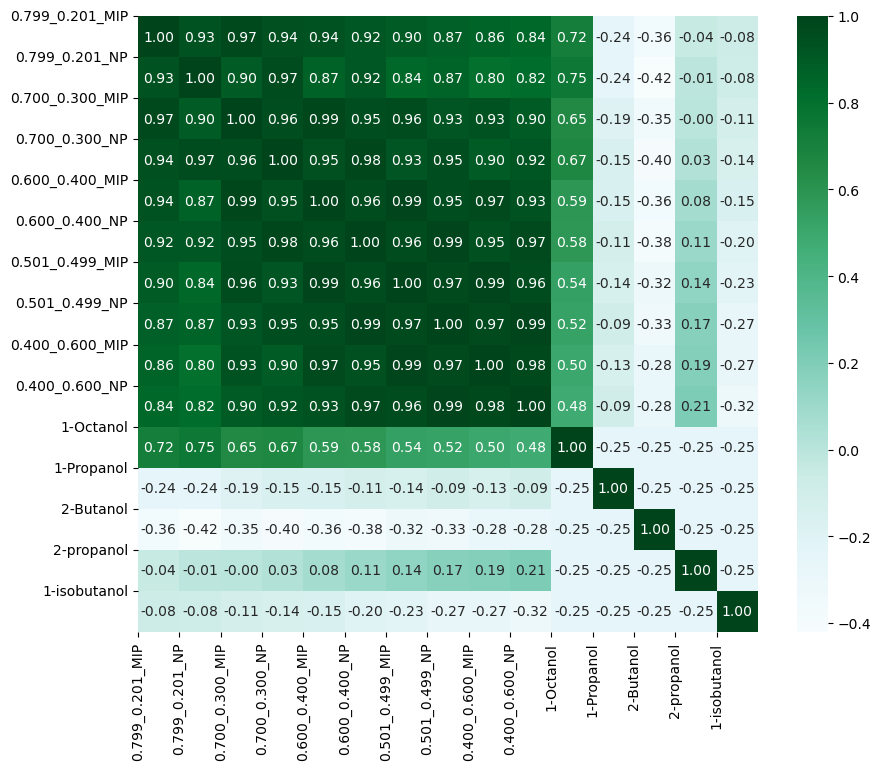

In [75]:
corr = dfv.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='BuGn', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Based on correlation matrix above, we will includes all MIP and NP data. They have high value of correlations. 

### Modeling

We will perform modeling to our dataset. The modeling we will be using is supervised learning, since this is a classification problem. The algorithm we will be using are : Support Vector Machine and Random Forest. 
<br>
We decide to use those 2 because :
<br>
<br>
##### Support Vector Machines (SVM):
<br>
1. Works well for both linear and non-linear classification when using appropriate kernel functions. In QCM-based alcohol classification, the relationships between the sensor responses and the types or concentrations of alcohols may not be linear. 
<br>
2. Can handle binary and multi-class classification. Since the alcohol has 5 different compound that are present in the dataset.
<br>
3. Effective separation : SVMs aim to find a hyperplane that maximizes the margin between different classes.In QCM alcohol classification, this can help separate different alcohol types or concentrations effectively, leading to clear decision boundaries.
<br>
<br>

##### Random Forest:
<br>
1. High Dimensional Data : Random Forest is capable of handling high-dimensional data without feature selection or dimensionality reduction. (QCM data often includes a large number of sensor measurements or features, making it a high-dimensional dataset.)
<br>
2. Variable Importance: Random Forest provides a measure of feature importance, allowing you to identify which sensor measurements are most relevant for classification. 
<br>
3. Balanced Dataset : Random Forest can handle such imbalances and provide reliable predictions for minority classes.


In [77]:
dfm = dfg.copy()

In [79]:
dfm.drop(columns=['label'],inplace=True)

In [80]:
dfm.head()

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


In [95]:
## Importing necessary libraries for SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix

In [83]:
dfm.columns

Index(['0.799_0.201_MIP', '0.799_0.201_NP', '0.700_0.300_MIP',
       '0.700_0.300_NP', '0.600_0.400_MIP', '0.600_0.400_NP',
       '0.501_0.499_MIP', '0.501_0.499_NP', '0.400_0.600_MIP',
       '0.400_0.600_NP', '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol'],
      dtype='object')

In [84]:
X = dfm.drop([ '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol'], axis=1)

y = dfm[[ '1-Octanol', '1-Propanol', '2-Butanol', '2-propanol',
       '1-isobutanol']]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
cols = X_train.columns

In [89]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [90]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [91]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [94]:
svc = SVC()

# Create a MultiOutputClassifier for multi-label classification
multi_output_svc = MultiOutputClassifier(svc)

# Fit the multi-output classifier to your data
multi_output_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_output_svc.predict(X_test)

C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\adeputri\anaconda3\lib\site

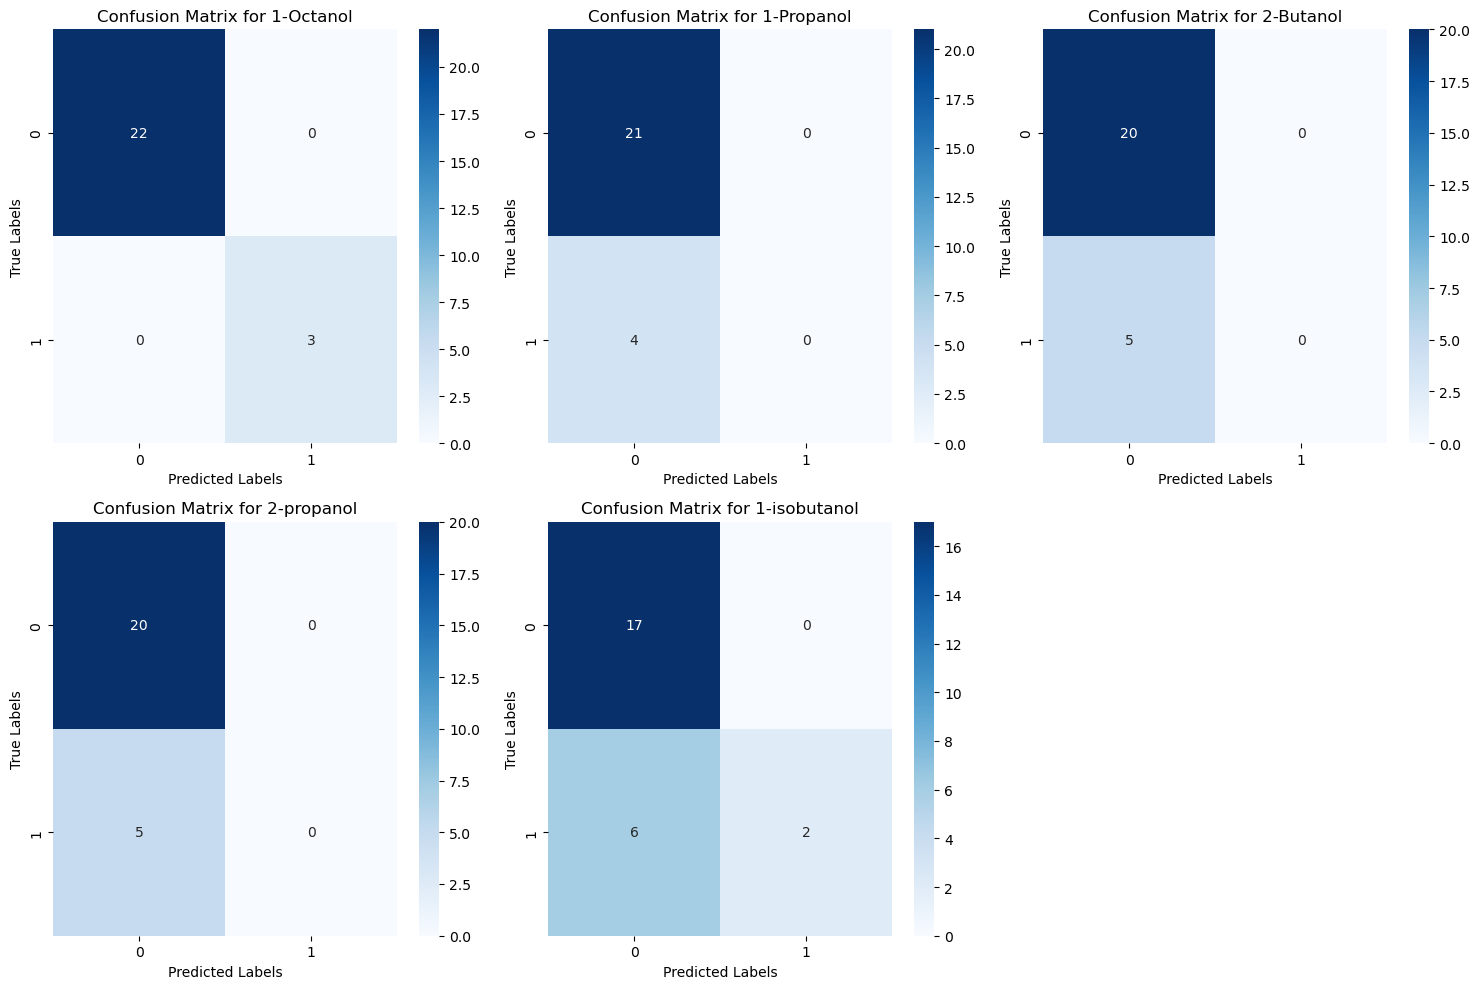

In [102]:
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Define the alcohol types
alcohol_types = ['1-Octanol', '1-Propanol', '2-Butanol', '2-propanol', '1-isobutanol']

# Plot the confusion matrices using Seaborn heatmaps
plt.figure(figsize=(15, 10))
for i in range(len(alcohol_types)):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {alcohol_types[i]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize lists to store precision, recall, F1-score, and accuracy for each alcohol type
precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

# Calculate metrics for each alcohol type
for i in range(len(alcohol_types)):
    # Extract the confusion matrix for the current alcohol type
    tn, fp, fn, tp = confusion_matrices[i].ravel()
    
    # Calculate precision, recall, and F1-score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    # Calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Append metrics to lists
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    accuracy_list.append(accuracy)

# Print the metrics for each alcohol type
for i, alcohol_type in enumerate(alcohol_types):
    print(f"Metrics for {alcohol_type}:")
    print(f"  Precision: {precision_list[i]:.2f}")
    print(f"  Recall: {recall_list[i]:.2f}")
    print(f"  F1-Score: {f1_score_list[i]:.2f}")
    print(f"  Accuracy: {accuracy_list[i]:.2f}")
    print("\n")


Metrics for 1-Octanol:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Accuracy: 1.00


Metrics for 1-Propanol:
  Precision: nan
  Recall: 0.00
  F1-Score: nan
  Accuracy: 0.84


Metrics for 2-Butanol:
  Precision: nan
  Recall: 0.00
  F1-Score: nan
  Accuracy: 0.80


Metrics for 2-propanol:
  Precision: nan
  Recall: 0.00
  F1-Score: nan
  Accuracy: 0.80


Metrics for 1-isobutanol:
  Precision: 1.00
  Recall: 0.25
  F1-Score: 0.40
  Accuracy: 0.76




C:\Users\adeputri\AppData\Local\Temp\ipykernel_15524\1134824601.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


Some of the values are nan because the sample size for a particular class is very small, statistical variations can lead to imprecise metrics.

#### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=42)

In [106]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

C:\Users\adeputri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


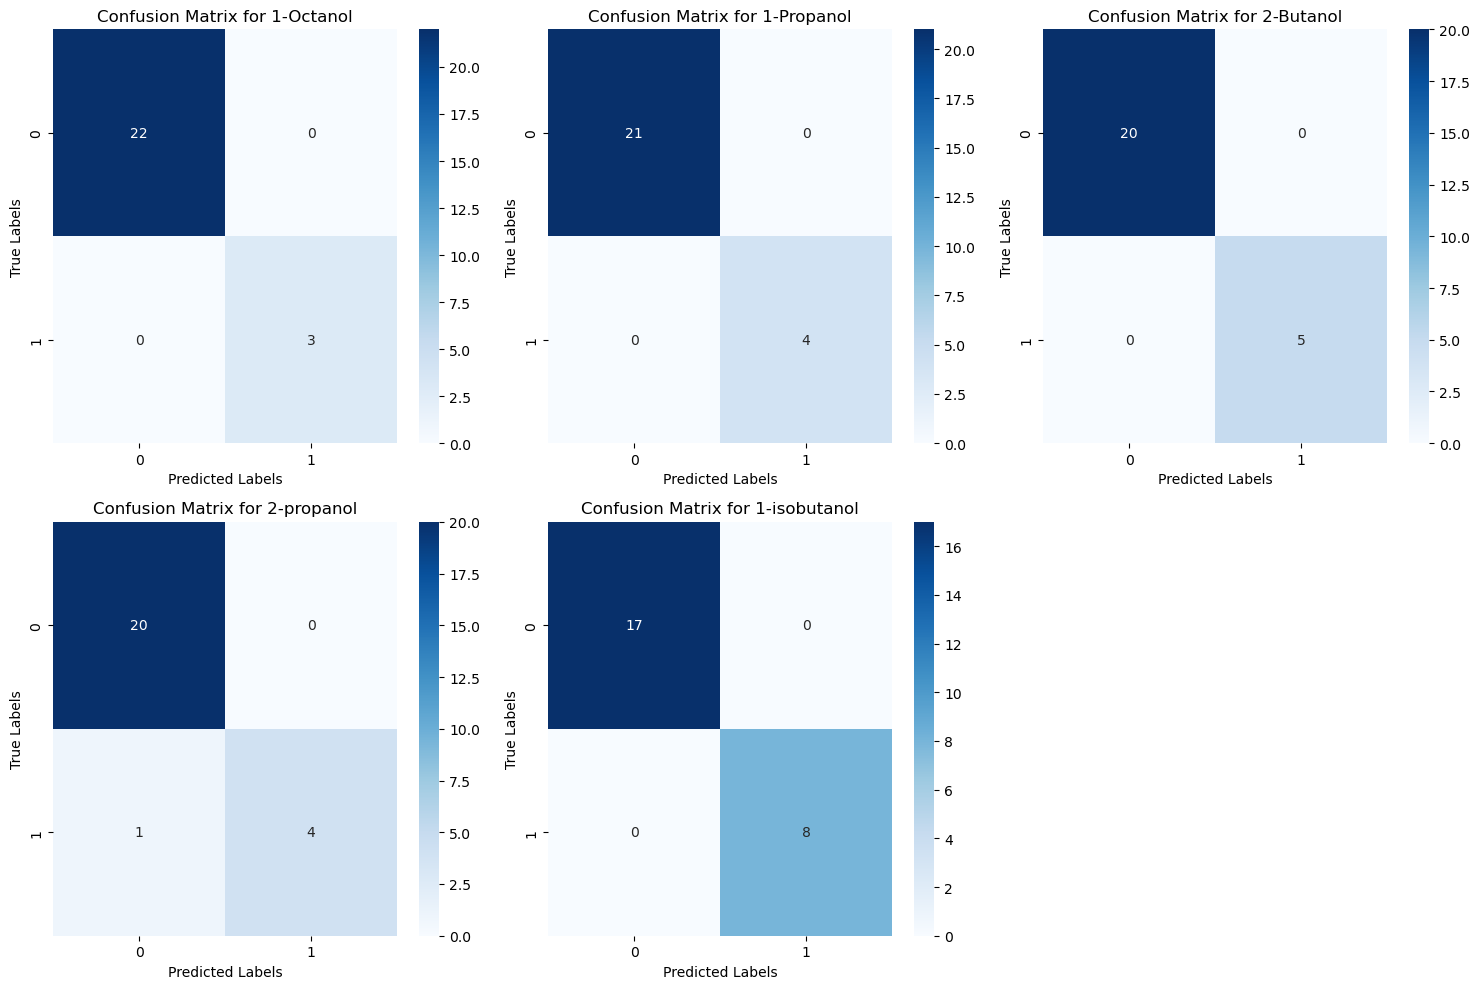

In [108]:
# Calculate the confusion matrices for each alcohol type
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Define the alcohol types
alcohol_types = ['1-Octanol', '1-Propanol', '2-Butanol', '2-propanol', '1-isobutanol']

# Plot the confusion matrices using Seaborn heatmaps
plt.figure(figsize=(15, 10))
for i in range(len(alcohol_types)):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {alcohol_types[i]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize lists to store precision, recall, F1-score, and accuracy for each alcohol type
precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

# Calculate metrics for each alcohol type
for i in range(len(alcohol_types)):
    # Extract the confusion matrix for the current alcohol type
    tn, fp, fn, tp = confusion_matrices[i].ravel()
    
    # Calculate precision, recall, and F1-score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    # Calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Append metrics to lists
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    accuracy_list.append(accuracy)

# Print the metrics for each alcohol type
for i, alcohol_type in enumerate(alcohol_types):
    print(f"Metrics for {alcohol_type}:")
    print(f"  Precision: {precision_list[i]:.2f}")
    print(f"  Recall: {recall_list[i]:.2f}")
    print(f"  F1-Score: {f1_score_list[i]:.2f}")
    print(f"  Accuracy: {accuracy_list[i]:.2f}")
    print("\n")

Metrics for 1-Octanol:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Accuracy: 1.00


Metrics for 1-Propanol:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Accuracy: 1.00


Metrics for 2-Butanol:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Accuracy: 1.00


Metrics for 2-propanol:
  Precision: 1.00
  Recall: 0.80
  F1-Score: 0.89
  Accuracy: 0.96


Metrics for 1-isobutanol:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Accuracy: 1.00




Random Forest perform better than the SVM Classification. But we must understand that if the Accuracy are 1.0 it may indicates overfitting. 
<br>
The further analysis needs to be conducted, like performing resampling to the data so it'll add more sample for training and testing
<br>
Perform grid search to find the best parameters in algorithm.